# Logistic Regression using Vectorized Code.



In the following Notebook I have Implemented the logistic regression algorithm on a real world data-set. The Implementation is not wholly complete as it only contains the Data-wrangling and feeding of the data into the algorithm.

## The Data Set

The DataSet is taken from UCI is based on a dataset of American adults with their relative information and based on that information we have to decide whether the person earns more than 50K USD per year or not.


#### Official Description

### Link to the DataSet :https://archive.ics.uci.edu/ml/datasets/Adult

## Data Wrangling Phase

Importing essential libraries for further processing of the data. From Sklearn we will import preprocessing because we will need it in normalization.

In [136]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [137]:
%matplotlib inline

Initialize Seed for the Numpy Random Function used later on

In [138]:
np.random.seed(103)

Read CSV File via Pandas and Name the Columns

In [139]:
r = pd.read_csv("adult_test_header.csv",delimiter=',')

In [140]:
r.columns = ['age','workclass','fnlwgt','education','education_num','martial-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','classifier']

Data Types of the Data Set

In [141]:
r.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
classifier        object
dtype: object

### Hot Encoding

Hot Encoded the Data Set as in if any feature in the dataset had values like say : gender = { male, female }.

Then that data would be transferred into two columns <strong> gender_male </strong> and <strong> gender_female </strong>

if he was male then gender_male = 1 else gender_female =1

### Why Hot Encoding ? 
 I used Hot Encoding instead of labelling 1,2,3,4 based on the respective labels because this would intefere in our calculations in the algorithm later on. As in if an option as in :  Work = { teacher,lawyer,doctor }  would be transformed in {1,2,3} then doctor would have more weight in our calculation as compared to the teacher. thus to eliminate this I used HotEncoding.

In [142]:
r_dum = pd.get_dummies(r).copy()
del r_dum['classifier_ <=50K.']

I made  r_class dataframe which contains the Classifier of the DataSet. ( That is whether the person earns more than 50k USD per month or not ) and deleted the classifier from the original data

In [143]:
r_class = pd.DataFrame()
r_class['class'] = r_dum['classifier_ >50K.'].copy()

In [144]:
del r_dum['classifier_ >50K.']
del r_dum['fnlwgt']

#### Normalization of Data

In [145]:
r_dum.head()

,age,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [146]:
norm = r_dum[['age','education_num','capital-gain','capital-loss','hours-per-week']].values

min_maxer = preprocessing.MinMaxScaler()
norm_scaled = min_maxer.fit_transform(norm)

norm_col = pd.DataFrame(norm_scaled)
norm_col.columns = ['age','education_num','capital-gain','capital-loss','hours-per-week']
print(norm_col.head())
r_dum[['age','education_num','capital-gain','capital-loss','hours-per-week']] = norm_col[['age','education_num','capital-gain','capital-loss','hours-per-week']]


        age  education_num  capital-gain  capital-loss  hours-per-week
0  0.287671       0.533333      0.000000           0.0        0.500000
1  0.150685       0.733333      0.000000           0.0        0.397959
2  0.369863       0.600000      0.076881           0.0        0.397959
3  0.013699       0.600000      0.000000           0.0        0.295918
4  0.232877       0.333333      0.000000           0.0        0.295918


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [147]:
r_dum.head()

,age,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.287671,0.533333,0.000000,0.0,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.150685,0.733333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.369863,0.600000,0.076881,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.013699,0.600000,0.000000,0.0,0.295918,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.232877,0.333333,0.000000,0.0,0.295918,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


##### Head of the Encoded Data without the classifier

In [148]:
r_dum.head()

,age,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.287671,0.533333,0.000000,0.0,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.150685,0.733333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.369863,0.600000,0.076881,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.013699,0.600000,0.000000,0.0,0.295918,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.232877,0.333333,0.000000,0.0,0.295918,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Shape of the Data

16280 Rows
107 Columns

In [149]:
r_dum.shape

(16280, 106)

In [150]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

##### Initialized the Weights ( Randomly )


In [151]:
weights = pd.DataFrame(np.random.rand(106))
print(weights.head())

          0
0  0.432111
1  0.174215
2  0.170944
3  0.827632
4  0.587171


#### Shape of the Weights

In [152]:
weights.shape

(106, 1)

#### Head of the Weights

In [153]:
weights.T.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.432111,0.174215,0.170944,0.827632,0.587171,0.459354,0.822685,0.821548,0.30712,0.200894,...,0.899746,0.953881,0.795349,0.17134,0.050201,0.83288,0.486724,0.095742,0.8806,0.530015


#### Random B aka intercept

In [154]:
b = np.random.rand(1)
print(b)

[0.95558362]


In [155]:
X = r_dum.values

In [156]:
W = weights.T.values

In [157]:
W.shape

(1, 106)

In [158]:
X.shape

(16280, 106)

The Following is the implementation of the Logistic Regression.

In [159]:
Z = np.dot(W,X.T)


Z = Z + b



L = list()

for col in Z.T:
    L.append(sigmoid(col))

A = np.array([L])
Y = np.array([r_class['class'].values])

Dz = A-Y

Db = Dz.sum()/Dz.size

Dw = np.dot(Dz,X)

alpha = 0.001

W = W - alpha*Dw

b = b - alpha*Db

## Implementation in Functions for usability


In [160]:
def Logistic_Regression(test, alpha,weights,b,epoch):
    LossList= list()
    L = list()
    X = test.values
    W = weights.T.values
    
    for x in range(epoch):
        Z = np.dot(W,X.T)
        Z = Z + b



        for col in Z.T:
            L.append(sigmoid(col))

        A = np.array([L])
        Y = np.array([r_class['class'].values])

        Dz = A-Y
        Db = Dz.sum()/Dz.size
        Dw = np.dot(Dz,X)

        W = W - alpha*Dw
        b = b - alpha*Db
        L.clear()
    print("Cummulative Error of all my Features is :",abs(Dz.sum()),"for alpha=",alpha)
    LossList = abs(Dz.sum())
    return LossList


## Time for Testing

Must keep the Random Variables fixed for testing

In [161]:
features = r_dum.shape
print("Number of Features",features[1])
weights = pd.DataFrame(np.random.rand(features[1]))
b = np.random.rand(1)



Number of Features 106


##### Note I am using the Absolute Cummulative Error of all my features as " LOSS" 

In [162]:
Logistic_Regression(r_dum,0.009,weights,b,100)

Cummulative Error of all my Features is : 2789.108356911378 for alpha= 0.009


2789.108356911378

In [163]:
alphas = 0.001
LossList  = list()
AlphaList = list()
for x in range(11):
    AlphaList.append(alphas)
    LossList.append(Logistic_Regression(r_dum,alphas,weights,b,50))
    alphas = alphas + 0.001
    

Cummulative Error of all my Features is : 5271.296446712771 for alpha= 0.001
Cummulative Error of all my Features is : 2010.536832220559 for alpha= 0.002
Cummulative Error of all my Features is : 2473.5628215762763 for alpha= 0.003
Cummulative Error of all my Features is : 512.6463110927789 for alpha= 0.004
Cummulative Error of all my Features is : 120.91004312482906 for alpha= 0.005
Cummulative Error of all my Features is : 3845.9999999688016 for alpha= 0.006
Cummulative Error of all my Features is : 250.70208815294785 for alpha= 0.007
Cummulative Error of all my Features is : 2796.522872947435 for alpha= 0.008
Cummulative Error of all my Features is : 3509.3714757290218 for alpha= 0.009000000000000001
Cummulative Error of all my Features is : 3257.54766967256 for alpha= 0.010000000000000002
Cummulative Error of all my Features is : 3842.9779220200166 for alpha= 0.011000000000000003


([<matplotlib.axis.YTick at 0x1e932bd6048>,
 <a list of 11 Text yticklabel objects>)

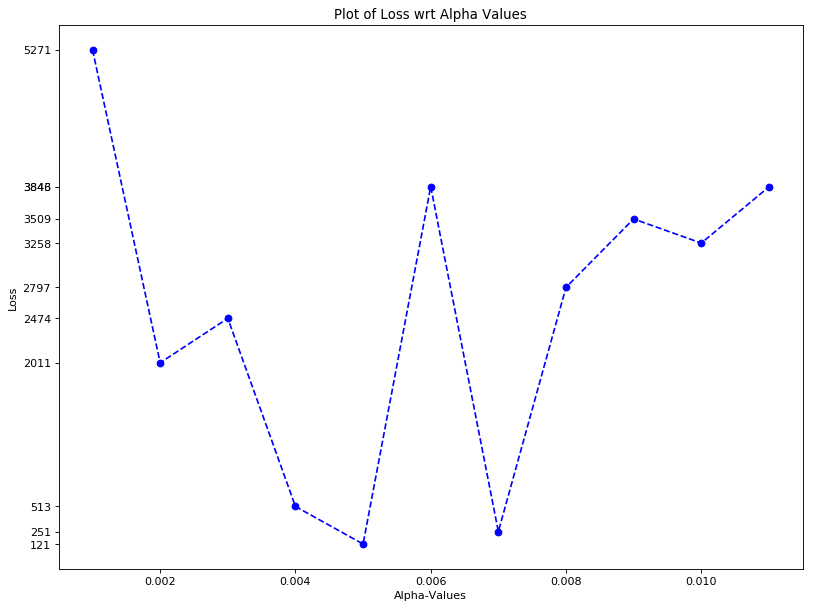

In [173]:
plt.figure(num=None, figsize=(12, 9), dpi=80)
plt.plot(AlphaList, LossList,'--bo')
plt.title("Plot of Loss wrt Alpha Values")
plt.xlabel("Alpha-Values")
plt.ylabel("Loss")
plt.yticks(LossList)